In [1]:
from examples.util.getDataset import getDataset
from examples.util.plotting import plot_w
from examples.util.test_fns import *
from examples.util.testing import shrimp_v_random, growth
from examples.util.metrics import shrimp_test, make_l2_loss
from sparse_rf.util import *
from sparse_rf.modules import make_A, make_W
from sparse_rf.algs import shrimp, l2, l1, sindy
from functools import partial
import matplotlib.pyplot as plt
from math import ceil
import gc

In [2]:
r = 9
fn = partial(fn9, r=r)
q = 1
d = 100
m = 200
N = 1500
l = 1e-13

Xtr, Xte, Ytr, Yte = getDataset(fn, d=d, m=m)

trials = 10

scales = np.arange(1/q, 206, 5)

In [3]:
for scale_ in scales:
    svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(scale_))
    errs_bp = []
    for _ in range(trials):
        W, _ = make_W(d, q, N, scale=1/np.sqrt(scale_))
        Atr = make_A(Xtr, W)
        Ate = make_A(Xte, W)
        c = l1(Atr, Ytr)
        Ypred = Ate@c
        err_bp = np.sum((Ypred-Yte)**2)/len(Yte)

        errs_bp.append(err_bp)

        del W
        del Atr
        del Ate
        del c
        del Ypred

        gc.collect()

    print("Variance: {}".format(scale_))
    print("Min l2: {}".format(svr_q.err_l2))
    print("SHRIMP: {}".format(svr_q.err_shrimp))
    print("Random pruning: {}".format(svr_q.err_r))
    print("Min l1: {}".format(np.mean(errs_bp)))
    print("----------------------------")

    del errs_bp
    del svr_q

    gc.collect()

Variance: 1.0
Min l2: 140.86340019372528
SHRIMP: 50.16485169419844
Random pruning: 40.86679548455824
Min l1: 135.43972164295047
----------------------------
Variance: 6.0
Min l2: 67.32112167838929
SHRIMP: 48.58191644439122
Random pruning: 52.85906025390727
Min l1: 193.117844854899
----------------------------
Variance: 11.0
Min l2: 56.53775481160492
SHRIMP: 36.12814012930348
Random pruning: 41.65086800473415
Min l1: 182.14063961314534
----------------------------
Variance: 16.0
Min l2: 51.26524330793692
SHRIMP: 51.209531135850774
Random pruning: 44.87053953058145
Min l1: 174.4988424044315
----------------------------
Variance: 21.0
Min l2: 45.2168000407459
SHRIMP: 17.341764454782684
Random pruning: 44.87504333383649
Min l1: 170.1509637494706
----------------------------
Variance: 26.0
Min l2: 42.01118836676423
SHRIMP: 1.3313916197850297
Random pruning: 45.42861429565097
Min l1: 159.29154554927678
----------------------------
Variance: 31.0
Min l2: 43.538619395679525
SHRIMP: 10.87403997

Min l2: 37.64630920121833
SHRIMP: 0.2141324503884053
Random pruning: 39.02178174811691


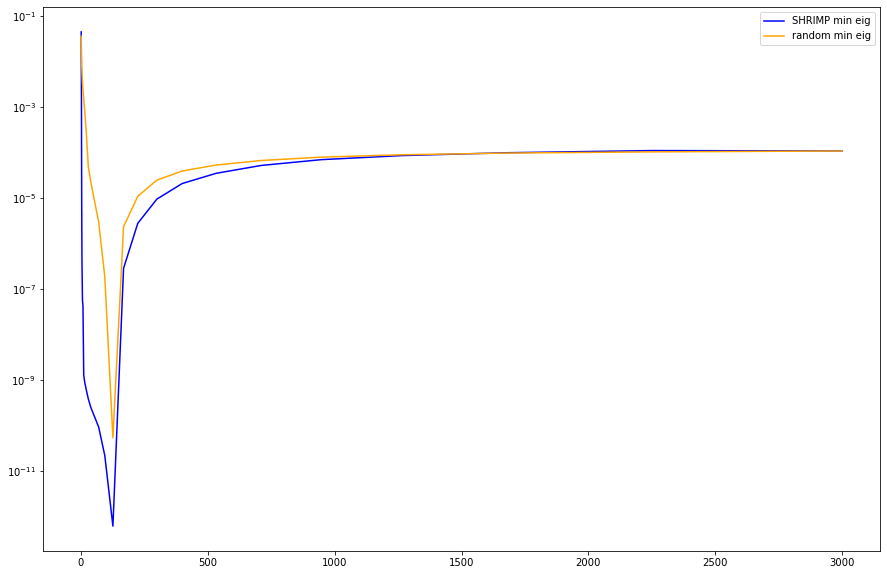

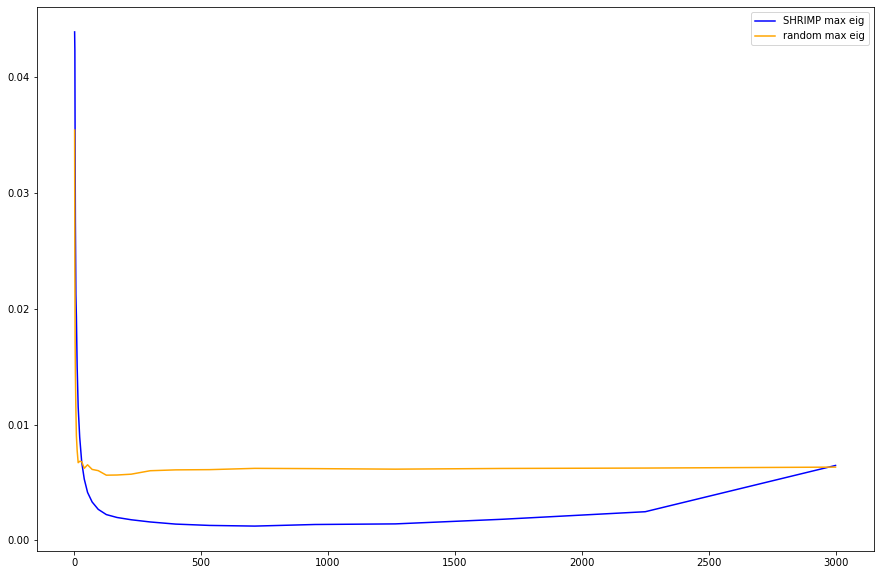

In [14]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(66))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

Min l2: 41.65355291814989
SHRIMP: 0.41271839037534075
Random pruning: 38.03114431030123


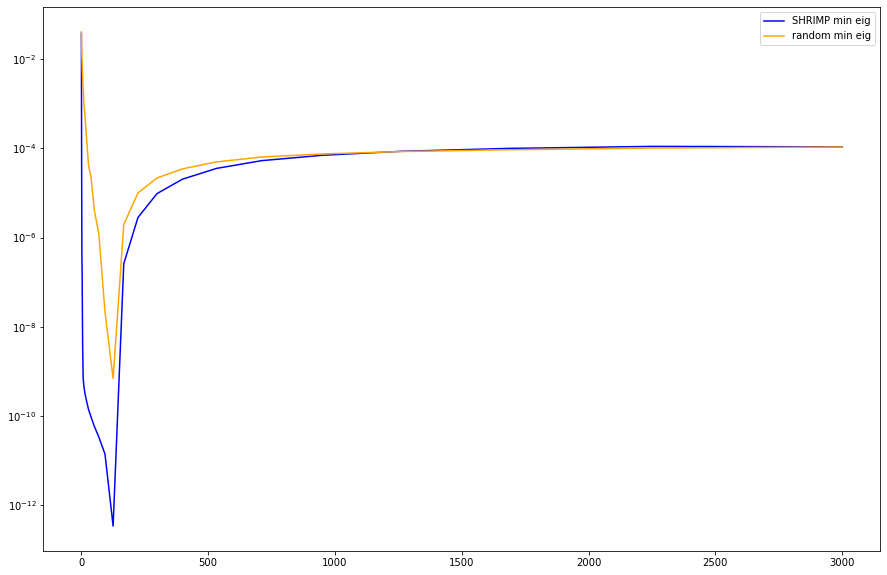

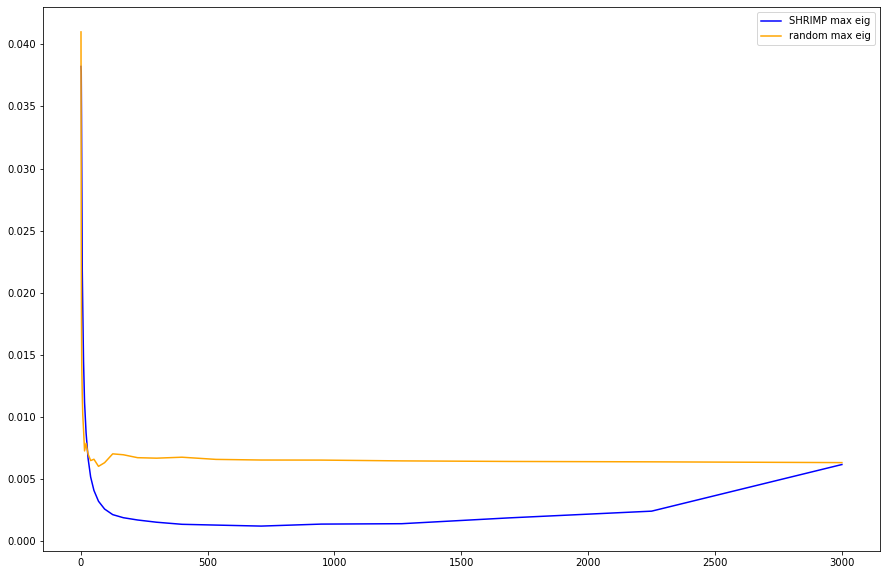

In [9]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(71))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

Min l2: 39.07900628995001
SHRIMP: 0.15856914610497058
Random pruning: 35.12316729274462


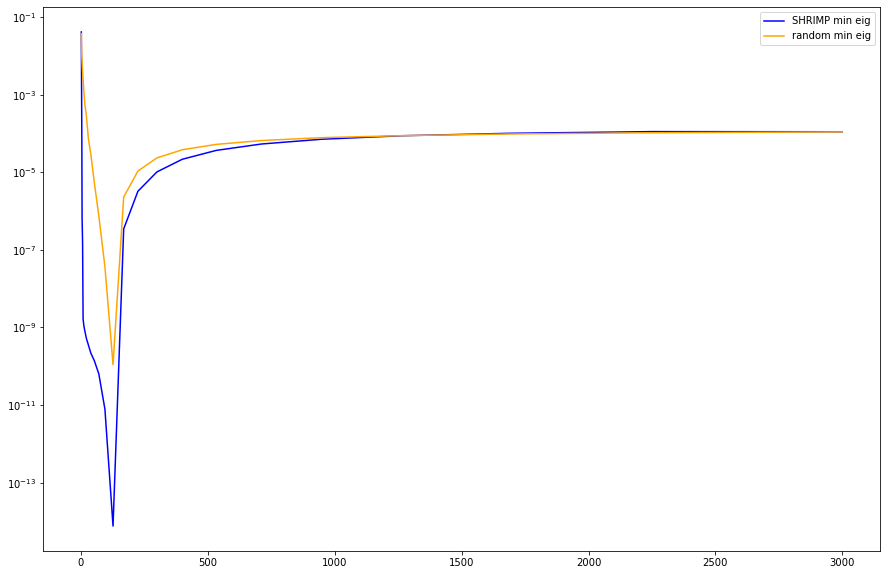

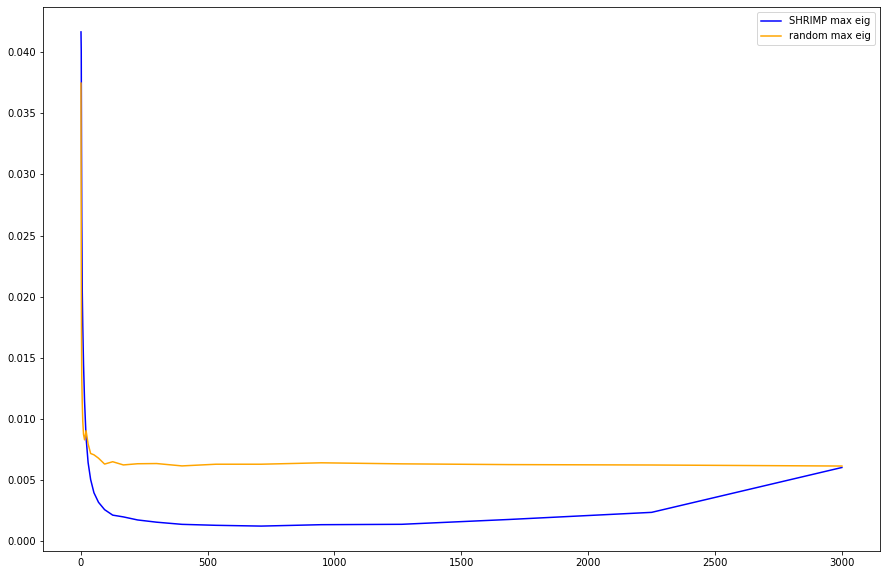

In [15]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(76))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

Min l2: 37.481780460146545
SHRIMP: 2.276088730759821
Random pruning: 38.493587170171125


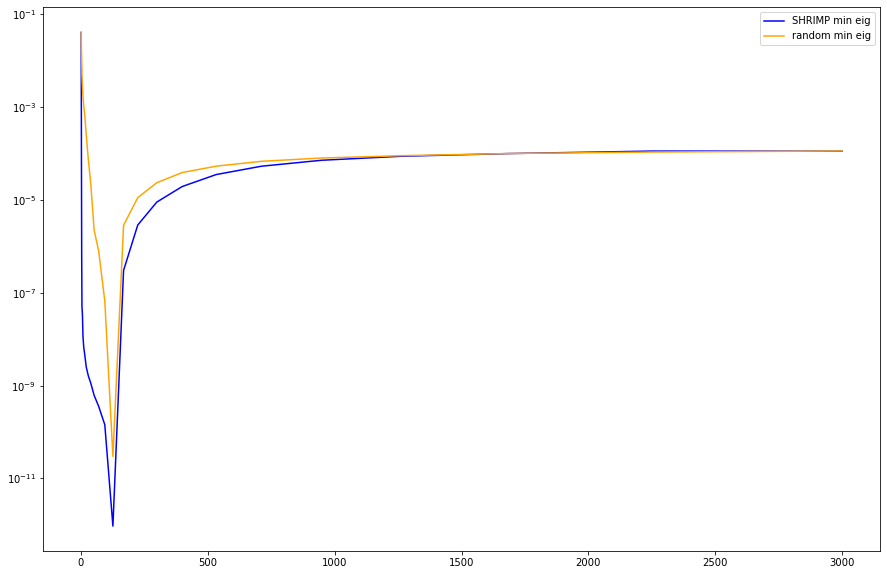

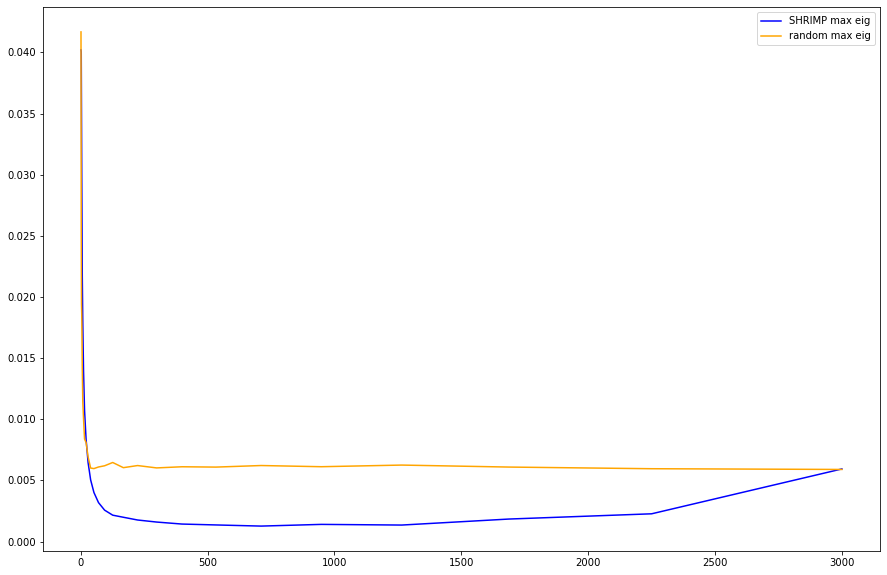

In [16]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(81))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

Min l2: 44.67922800344988
SHRIMP: 28.168900751787767
Random pruning: 39.61091872269281


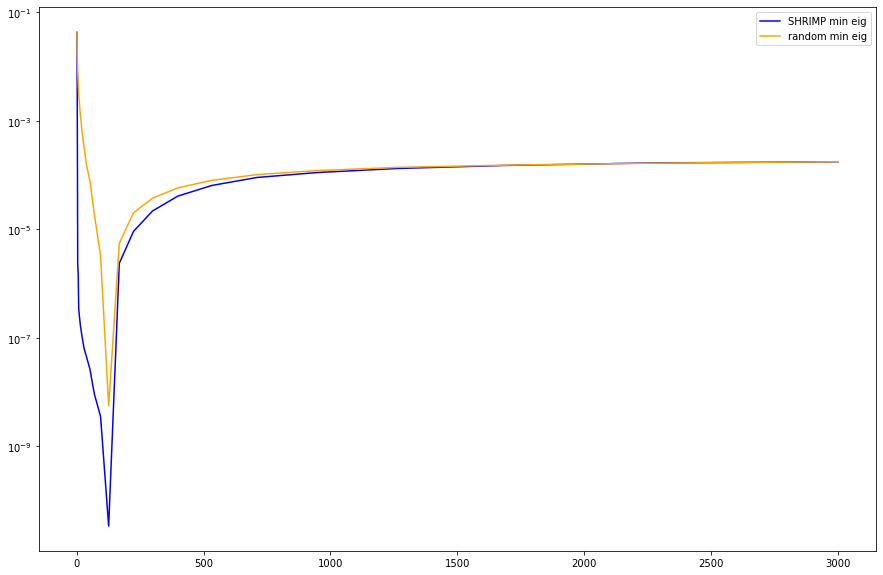

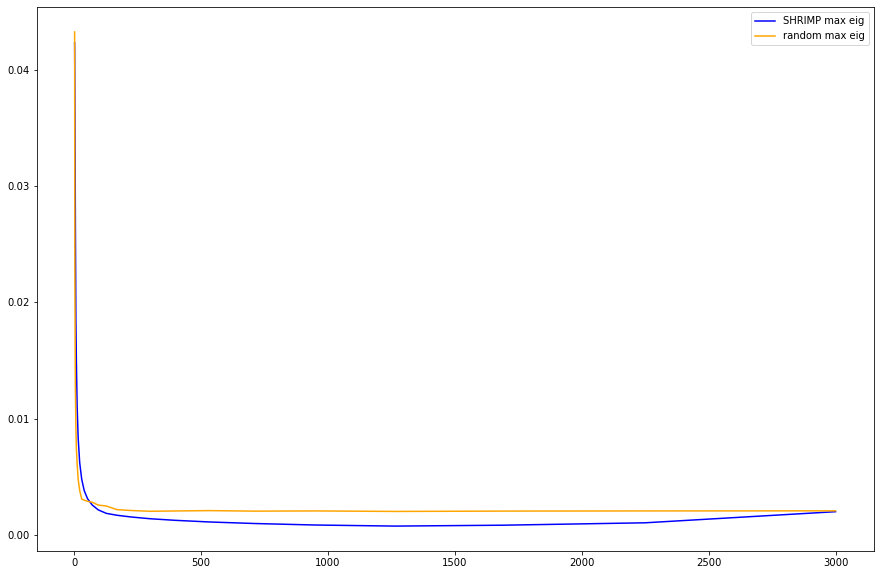

In [18]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(1000))
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))
plt.figure(figsize=(15, 10))
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_s_min[:]) / np.array(svr_q.lengths), label="SHRIMP min eig", color="blue")
plt.semilogy(svr_q.lengths[:], np.array(svr_q.eigs_r_min[:]) / np.array(svr_q.lengths), label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, np.array(svr_q.eigs_s_max[:]) / np.array(svr_q.lengths), label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, np.array(svr_q.eigs_r_max[:]) / np.array(svr_q.lengths), label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()